In [8]:
#---------------------------------------- support
import sys
import matplotlib.pyplot as plt
import numpy as np

#---------------------------------------- Data
from   pandas import read_csv
from   sklearn.preprocessing import LabelEncoder


#---------------------------------------- Model
from   sklearn.tree import DecisionTreeClassifier, plot_tree
from   sklearn.model_selection import train_test_split

#---------------------------------------- Evaluation
from   sklearn.metrics import confusion_matrix, classification_report
#from   sklearn.metrics import roc_auc_score
from   sklearn.metrics import accuracy_score

In [9]:
def DBPlot(m, X, y, nGrid=100):
    ## find the extent of the features
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    ## make a dense grid (nGrid x nGrid) in this extent
    xx1, xx2=np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                         np.linspace(x2_min, x2_max, nGrid))
    XX=np.column_stack((xx1.ravel(), xx2.ravel()))
    ## predict on the grid
    hatyy=m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    ## show the predictions as an semi-transparent image
    _=plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                 aspect="auto",
                 interpolation='none', origin='lower',
                 alpha=0.3)
    ## add the actual data points on the image
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [10]:
showD=1
showM=1
showE=1

#______________________________________________________________
#             DATA
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨

filename = 'cardiacRisk.csv'
    
df = read_csv(filename)

if showD:
    print(df.describe())

data = df.values
M    = data.shape[1]-1
X    = data[:,1:M]
y    = data[:,M]
N    = y.size

           Gender         Age          HR         SBP          ST         CRT  \
count  457.000000  457.000000  457.000000  457.000000  457.000000  457.000000   
mean     0.787746   61.805252  131.783370   75.796499    0.531729    1.379431   
std      0.409352   17.501984   26.692102   17.092118    0.499539    1.266251   
min      0.000000   -1.000000   60.000000   41.000000    0.000000    0.600000   
25%      1.000000   55.000000  112.000000   63.000000    0.000000    1.000000   
50%      1.000000   64.000000  132.000000   74.000000    1.000000    1.100000   
75%      1.000000   74.000000  148.000000   86.000000    1.000000    1.300000   
max      1.000000   91.000000  221.000000  151.000000    1.000000   11.500000   

            Event  
count  457.000000  
mean     0.391685  
std      0.488662  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


In [4]:
df[:10]

,Gender,Age,HR,SBP,ST,CRT,Event
0,1.0,33.0,132.0,92.0,1.0,0.8,0.0
1,1.0,69.0,147.0,53.0,0.0,1.4,0.0
2,1.0,63.0,142.0,41.0,1.0,1.1,1.0
3,0.0,79.0,147.0,106.0,1.0,0.9,1.0
4,0.0,61.0,107.0,82.0,0.0,1.1,0.0
5,1.0,61.0,89.0,72.0,0.0,1.3,0.0
6,0.0,46.0,103.0,91.0,0.0,0.9,0.0
7,0.0,71.0,100.0,71.0,1.0,1.3,1.0
8,1.0,44.0,135.0,74.0,0.0,0.9,0.0
9,1.0,54.0,112.0,67.0,0.0,1.4,1.0


In [11]:
#______________________________________________________________
#             Data  transform
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
le = LabelEncoder()
y  = le.fit_transform(y)
for column in range(0,5):
    le = LabelEncoder()
    X[:,column] = le.fit_transform(X[:,column])

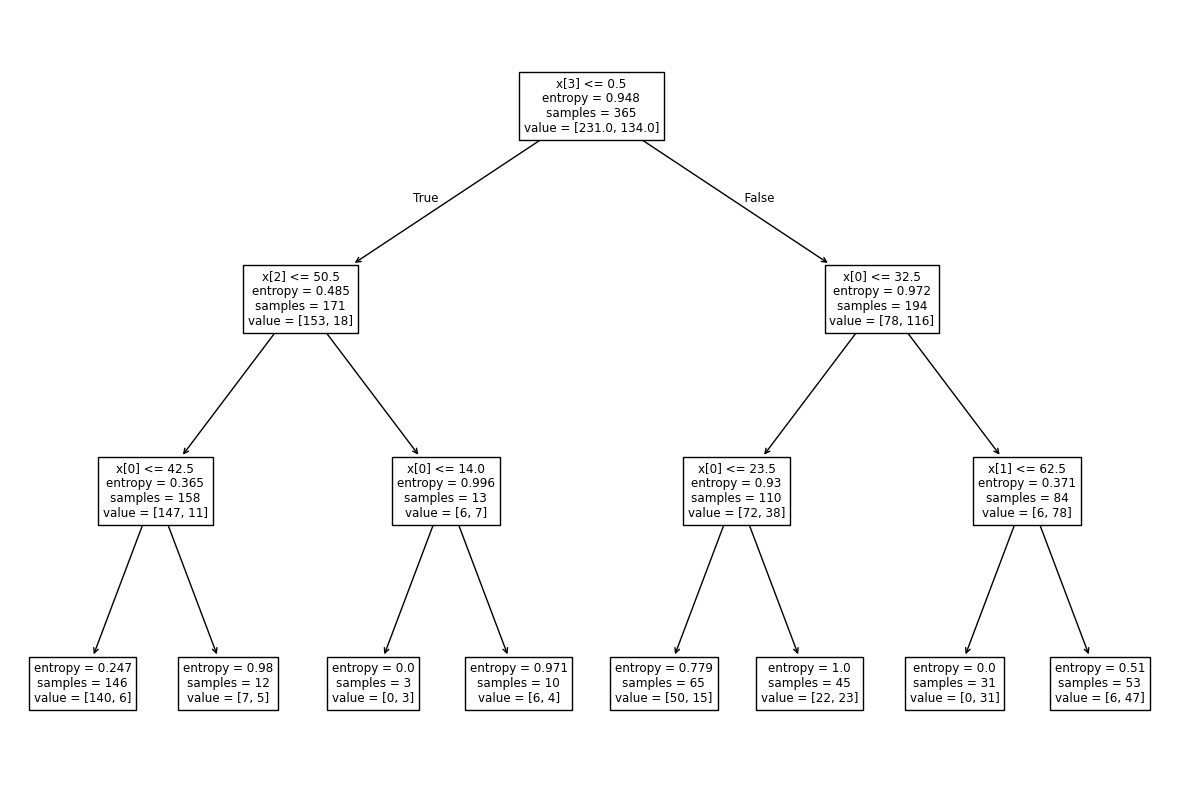

In [ ]:
#______________________________________________________________
#             Traininig  / Model
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = 0.2, random_state = 42)

model = DecisionTreeClassifier(criterion='entropy',
                             splitter='best',
                             max_depth=3,
                             #min_samples_split=4,
                             #min_samples_leaf=2,
                             #max_features=None,                            
                             #max_leaf_nodes=4
                             )
model = model.fit(Xtrain, ytrain)

if showM:
    plt.figure(figsize=(15,10))
    plot_tree(model)
    plt.savefig()

In [60]:
#______________________________________________________________
#             Evaluation
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨

#---------------------------------------------------- Train
model = model.fit(Xtrain, ytrain)
ypred= model.predict(Xtrain)
cm    = confusion_matrix(ytrain, ypred)
TN, FP, FN, TP = cm.ravel()
SE    = TP/(TP+FN)
SP    = TN/(TN+FP)
acc1  = accuracy_score(ytrain, ypred)
performance1 = classification_report(ytrain, ypred)

if showE:
    print('------ Traning ----------------')
    print('Sensitivity: ', SE)
    print('Specificity: ', SP)
    print('Accuracy   : ', acc1)
    #print("Classification Report:", performance1)

------ Traning ----------------
Sensitivity:  0.7761194029850746
Specificity:  0.8787878787878788
Accuracy   :  0.8410958904109589


In [61]:
#---------------------------------------------------- Test
ypred  = model.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
TN, FP, FN, TP = cm.ravel()
SE= TP/(TP+FN)
SP= TN/(TN+FP)
F1= 2*TP/(2*TP+FP+FN)

acc2  = accuracy_score(ytest, ypred)
performance2 = classification_report(ytest, ypred)

if showE:
    print('------ Testing ----------------')
    print('Sensitivity: ', SE)
    print('Specificity:', SP)
    print('Accuracy   :', acc2)
    print('F1score    :', F1)
    #print("Classification Report:", performance2)

------ Testing ----------------
Sensitivity:  0.6444444444444445
Specificity: 0.8936170212765957
Accuracy   : 0.7717391304347826
F1score    : 0.7341772151898734
